# Chapter 1: General Introduction

## What is machine learning ?

- Discipline in the overlap of computer science and statistics
- Subset of Artificial Intelligence (AI)
- Term "Machine Learning" was first used in 1959 by AI pioneer Arthur Samuel

- **Learn models from data**


So the field is not as new as one might think, but due to more available data, processing power and development of better algorithms more applications of machine learning appeared during the last 15 years.

## About  models

Model examples: 

   1. Where will my car stop when I break now ?
   2. Where on the night sky will I see the moon tonight ?
   2. Is the email I received spam ? 
   4. What article X should I recommend to my customers Y ?
   
The first two questions can be answered based on existing mathematically explicit models (formulas). 

For the  questions 3 and 4 it is difficult to develop explicitly formulated models. 

These problems 3 and 4 have the following in common:

- No exact model known or implementable
- Vague understanding of the problem domain
- Enough data with sufficient (implicit) information available

E.g. for the spamming example:

- We have no explicit formula for such a task
- We know that specific words are specific for spam emails, other words are specific for my personal and job emails.
- My mailbox is full with examples for spam vs non-spam.


**In such cases machine learning offers approaches to build models based on example data.**


## Some history

Rough time line with a few examples

 
    1812: Bayes Theorem
    1913: Markov Chains
    1951: First neural network
    1969: Book "Perceptrons": Limitations of Neural Networks
    1986: Backpropagation to learn neural networks
    1995: Randomized Forests and Support Vector Machines
    1998: Application of naive Bayes Classifier for Spam detection
    2000+: Deep learning

## What are features ?

In most cases we can arange data used for machine learning as a matrix:

In [3]:
import pandas as pd

features = pd.read_csv("beers.csv")
features.head()

alcohol_content  bitterness  darkness  fruitiness  is_yummy
0         3.739295    0.422503  0.989463    0.215791         0
1         4.207849    0.841668  0.928626    0.380420         0
2         4.709494    0.322037  5.374682    0.145231         1
3         4.684743    0.434315  4.072805    0.191321         1
4         4.148710    0.570586  1.461568    0.260218         0



- every row of such a matrix is called a **sample** or **feature vector**. 
- every column name is called a **feature name** or **attribute**.
- the cells are **feature values**.

This table holds five samples.

The feature names are `alcohol_content`, `bitterness`, `darkness`, `fruitiness` and `is_yummy`.

(Almost) all machine learning algorithms require that your data is numerical and/or categorial. In some applications it is not obvious how to transform data to a numerical presentation.

Definition:

*Categorical data*: data which has only a limited set of allowed values. A `taste` feature could only allow values `sour`, `bitter`, `sweet`, `salty`.

### How to represent images as  feature vectors

Computers represent images as matrices. Every cell in the matrix represents one pixel, and the value in the matrix cell its color.

`scikit-learn`  includes some example data sets which we load now:

In [4]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
dd = load_digits()

Next we plot the first nine digits from this data set:

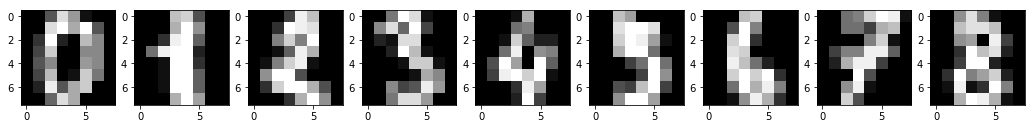

In [6]:
N = 9
plt.figure(figsize=(2 * N, 5))
for i, image in enumerate(dd.images[:N], 1):
    plt.subplot(1, N, i)
    plt.imshow(image, cmap="gray")

And this is the first image from the data set, it is a 8 x 8 matrix with values 0 to 15:

In [7]:
print(dd.images[0].shape)
print(dd.images[0])

(8, 8)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


To transform such an image to a feature vectore we just have to concatenate the rows to one single vector of size 64:

In [13]:
vector = dd.images[0].flatten()
print(vector.shape)
print(vector)

(64,)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


### How to present textual data as feature vectors ?

To transform some text into a feature vector, we first need a enumerated dictionary. Such a dictionary can be very large, but for the sake of simplicity we use a very small dictionary to explain the overall procedure:


| Word     | Index |
|----------|-------|
| like     | 0     |
| dislike  | 1     |
| american | 2     |
| italian  | 3     |
| beer     | 4     |
| pizza    | 5     |

To "vectorize" a given text we count the words in the text which also exist in the vocabulary and put the counts at the given position `Index`.

E.g. `"I dislike american pizza, but american beer is nice"`:

| Word     | Index | Count |
|----------|-------|-------|
| like     | 0     | 1     |
| dislike  | 1     | 1     |
| american | 2     | 2     |
| italian  | 3     | 0     |
| beer     | 4     | 1     |
| pizza    | 5     | 1     |

The according feature vector is the `Count` column, which is:

`[0, 1, 2, 0, 1, 1]`

And this is how we can compute such a word vector using Python:

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from itertools import count

# map words to index in created vector:
vocabulary = ["like", "dislike", "american", "italian", "beer", "pizza"]

vectorizer = CountVectorizer(vocabulary=dict(zip(vocabulary, count())))

# crate count vector for a pice of text:
vector = vectorizer.fit_transform(["I dislike american pizza. But american beer is nice"]).toarray()[0]
print(vector)

[0 1 2 0 1 1]


## Taxonomy of machine learning

We can separate learning problems in a few large categories: **supervised** and **unsupervised** learning.

In **supervised learning** the the data comes with additional attributes that we want to predict. Such a problem can be either 

- **classification**: samples belong to two or more discrete classes and we want to learn from already labeled data how to predict the class of unlabeled data. This is the same as saying, that the output is categorical.
    
- **regression**: if the desired output consists of one or more continuous variables, then the task is called regression.
    
    

Examples for supervised learning:

- Classification: Predict the class `is_yummy`  based on the attributes `alcohol_content`,	`bitterness`, 	`darkness` and `fruitiness`. (two class problem).

- Classification: predict the digit-shown based on a 8 x 8 pixel image (this is a multi-class problem).

- Regression: Predict the length of a salmon based on its age and weight.


In **unsupervised learning**, in which the training data consists of samples without any corresponding target values, one tries to find structure in data. Common applications are

- Clustering 
- Density estimation
- Dimension reduction (PCA, ...)

This course will only introduce concepts and methods from **supervised learning**.

## How to apply machine learning in practice ?

Application of machine learning in practice consists of several phases:

1. Learn / train a model from example data
2. Analyze model for its quality / performance
2. Apply this model to new incoming data

In practice steps 1. and 2. are iterated for different machine learning algorithms until performance is optimal or sufficient. 

## Exercise section

Our example beer data set reflects the very personal opinion of one of the tutors which beer he likes and which not. To learn a predictive model and to understand influential factors all beers went through some lab analysis to measure alcohol content, bitterness, darkness and fruitiness.

In [28]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# read some data

beer_data = pd.read_csv("beers.csv")
beer_data.head()

alcohol_content  bitterness  darkness  fruitiness  is_yummy
0         3.739295    0.422503  0.989463    0.215791         0
1         4.207849    0.841668  0.928626    0.380420         0
2         4.709494    0.322037  5.374682    0.145231         1
3         4.684743    0.434315  4.072805    0.191321         1
4         4.148710    0.570586  1.461568    0.260218         0

In [29]:
# split matrix into features and labels
features = beer_data.iloc[:, :-1]
labels = beer_data.iloc[:, -1]

print(features.head())
print()
print(labels.head())

   alcohol_content  bitterness  darkness  fruitiness
0         3.739295    0.422503  0.989463    0.215791
1         4.207849    0.841668  0.928626    0.380420
2         4.709494    0.322037  5.374682    0.145231
3         4.684743    0.434315  4.072805    0.191321
4         4.148710    0.570586  1.461568    0.260218

0    0
1    0
2    1
3    1
4    0
Name: is_yummy, dtype: int64


In [32]:
classifier = LogisticRegression(C=1)
classifier.fit(features, labels)
print(classifier)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [34]:
predicted_labels = classifier.predict(features)


print(len(labels), "examples")
print(sum(predicted_labels == labels), "labeled correctly")

225 examples
199 labeled correctly


## Comment
Are you surprised that not all labels where predicted correctly ?

Reasons for this can be:
- missing information: maybe other features of beer which contribute to the rating where not measured or can not be measured.
- noisy information: features can be noisy

In [27]:
classifier = SVC()
classifier.fit(features, labels)

predicted_labels = classifier.predict(features)

print(predicted_labels.shape)
print(labels.shape)
print(sum(predicted_labels == labels))

(225,)
(225,)
205


In [1]:
#REMOVEBEGIN
# THE LINES BELOW ARE JUST FOR STYLING THE CONTENT ABOVE !

from IPython import utils
from IPython.core.display import HTML
import os
def css_styling():
    """Load default custom.css file from ipython profile"""
    base = utils.path.get_ipython_dir()
    styles = """<style>
    
    @import url('http://fonts.googleapis.com/css?family=Source+Code+Pro');
    
    @import url('http://fonts.googleapis.com/css?family=Kameron');
    @import url('http://fonts.googleapis.com/css?family=Crimson+Text');
    
    @import url('http://fonts.googleapis.com/css?family=Lato');
    @import url('http://fonts.googleapis.com/css?family=Source+Sans+Pro');
    
    @import url('http://fonts.googleapis.com/css?family=Lora'); 

    
    body {
        font-family: 'Lora', Consolas, sans-serif;
       
        -webkit-print-color-adjust: exact important !;
       
    }
    .rendered_html code
    {
        color: black;
        background: #eaf0ff;
 
        padding: 1pt;
        font-family:  'Source Code Pro', Consolas, monocco, monospace;
    }
    
    .CodeMirror pre {
    font-family: 'Source Code Pro', monocco, Consolas, monocco, monospace;
    }
    
    .cm-s-ipython span.cm-keyword {
        font-weight: normal;
     }
     
     strong {
         background: #ffe7e7;
         padding: 1pt;
     }
     
    
    div #notebook {
        # font-size: 10pt; 
        line-height: 145%;
        }
        
    li {
        line-heigt: 145%;
    }

    div.output_area pre {
        background: #fff9d8 !important;
        padding: 5pt;
       
       -webkit-print-color-adjust: exact; 
        
    }
 
    
 
    h1, h2, h3, h4 {
        font-family: Kameron, arial;
    }
    
    div#maintoolbar {display: none !important;}
    </style>"""
    return HTML(styles)
css_styling()
#REMOVEEND

/Users/uweschmitt/Projects/machinelearning-introduction-workshop/venv3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: get_ipython_dir has moved to the IPython.paths module since IPython 4.0.
  if __name__ == '__main__':
